In [2]:
using Plots
gr(size=(600,600))
default(fmt = :png)

# Eq. Dif. - Problemas de Valor Inicial

\begin{align}
y'(t) & = f(t,y) \\
y(t_0) & = y_0.
\end{align}

Ex.:
\begin{align}
y'(t) & = t y(t) \\
y(-1) & = 1.
\end{align}

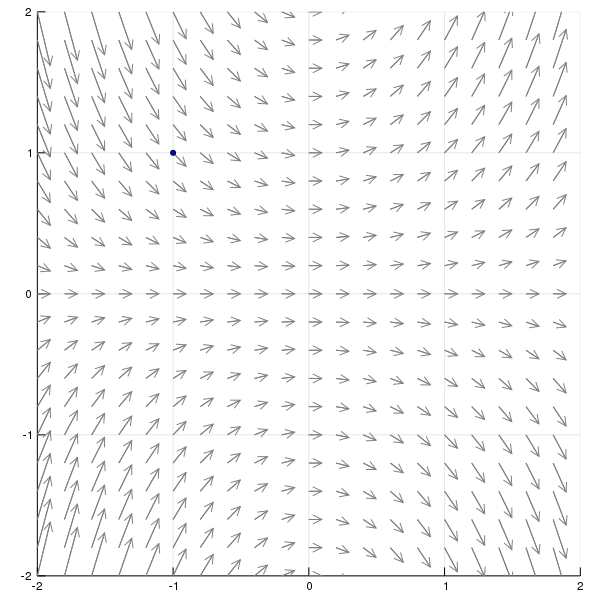

In [3]:
N = 21
f(t, y) = t * y
x = linspace(-2, 2, N)
quiver(x, x', quiver=(t,y)->[1.0; f(t,y)] / N * 2, c=:grey)
scatter!([-1], [1], c=:blue, ms=3, leg=false)
xlims!(extrema(x)...)
ylims!(extrema(x)...)

Visualmente, como $y'(t)$ mede a variação de $y$, podemos seguir na inclinação dada.

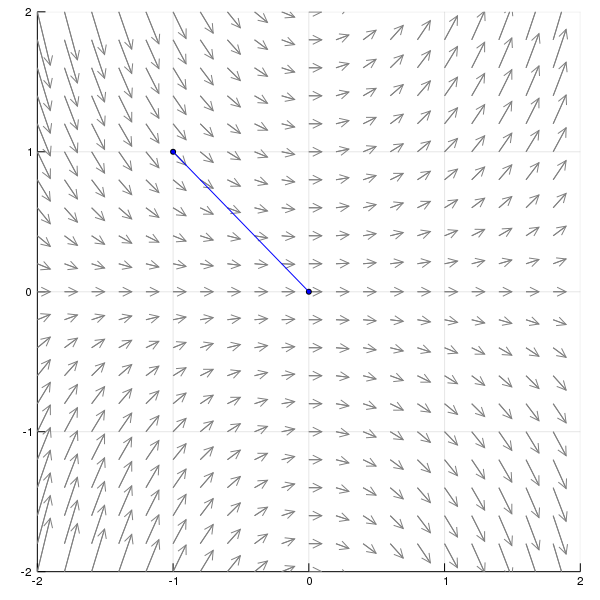

In [4]:
t0, y0 = -1.0, 1.0
h = 1.0
t1 = t0 + h
y1 = y0 + h * f(t0, y0)
quiver(x, x', quiver=(t,y)->[1.0; f(t,y)] / N * 2, c=:grey)
scatter!([t0; t1], [y0; y1], c=:blue, ms=3, leg=false)
plot!([t0; t1], [y0; y1], c=:blue)
xlims!(extrema(x)...)
ylims!(extrema(x)...)

Esse pequeno passo nos dá outra direção pra seguir, e o ponto $y_1$ aproxima $y(t_1)$. Vamos repetir esse processo.

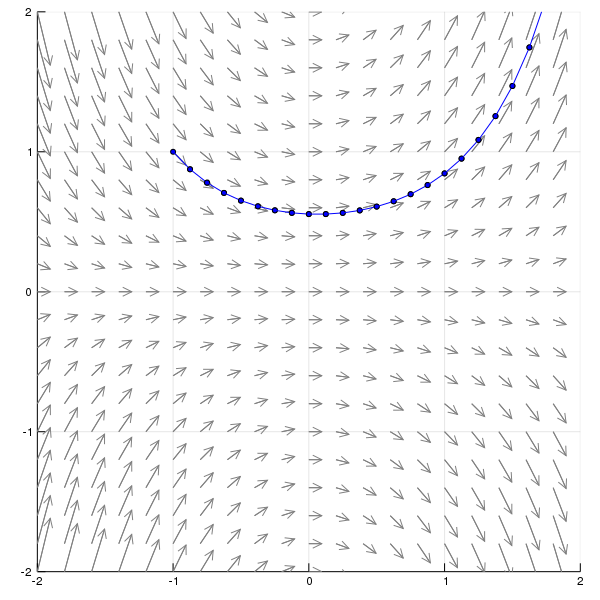

In [5]:
t0, y0 = -1.0, 1.0
h = 0.125

quiver(x, x', quiver=(t,y)->[1.0; f(t,y)] / N * 2, c=:grey)
for k = 1:30
    t1 = t0 + h
    y1 = y0 + h * f(t0, y0)
    scatter!([t0; t1], [y0; y1], c=:blue, ms=3, leg=false)
    plot!([t0; t1], [y0; y1], c=:blue)
    t0, y0 = t1, y1
end
xlims!(extrema(x)...)
ylims!(extrema(x)...)

De fato obtemos uma aproximação para valores de $y(t_i)$. Podemos comparar com a solução exata, que nesse caso é
$y(t) = e^{t^2/2 - 1}$

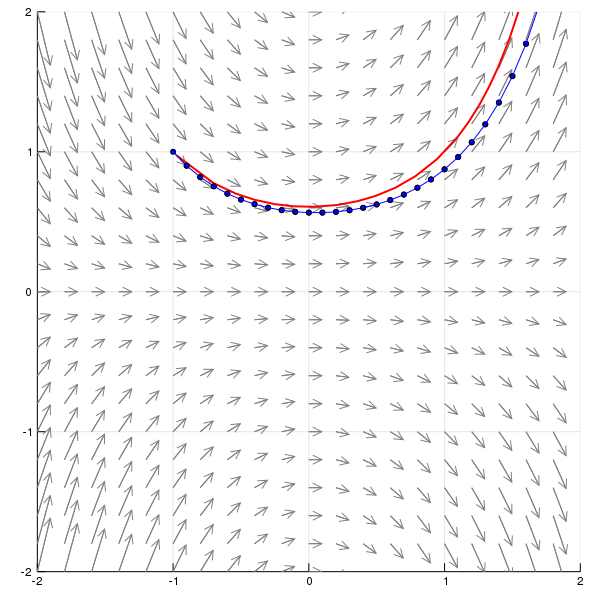

In [6]:
t0, y0 = -1.0, 1.0
h = 0.1

quiver(x, x', quiver=(t,y)->[1.0; f(t,y)] / N * 2, c=:grey)
plot!(t -> exp(t^2/2 - 1/2), -1, 2, c=:red, lw=2)
for k = 1:60
    t1 = t0 + h
    y1 = y0 + h * f(t0, y0)
    scatter!([t0; t1], [y0; y1], c=:blue, ms=3, leg=false)
    plot!([t0; t1], [y0; y1], c=:blue)
    t0, y0 = t1, y1
end
xlims!(extrema(x)...)
ylims!(extrema(x)...)

Isso define o **Método de Euler**.

## Método de Euler

Sendo $y'(t) = f(t,y(t))$, e $y(t_0) = y_0$, buscamos aproximações para $y(t_i)$, $t_i = t_{i-1} + h$.
Primeiro, definimos que buscamos $y(t_N)$ para $N > 0$, e que os valores $y(t_i)$ são aproximados por $y_i$.

Geometricamente, dado $(t_i,y_i)$, como a inclinação da reta tangente é $y'(t_i) = f(t_i,y(t_i)) \approx f(t_i,y_i)$, então daremos um passo nessa direção:
$$ y_{i+1} - y_i = f(t_i,y_i) (t_{i+1} - t_i). $$
Sendo $h = t_{i+1} - t_i$, obtemos a iteração
$$ y_{i+1} = y_i + hf(t_i,y_i). $$

A implementação é bastante simples, e uma questão essencial é se queremos guardar todos os $y_i$ ou apenas o último.

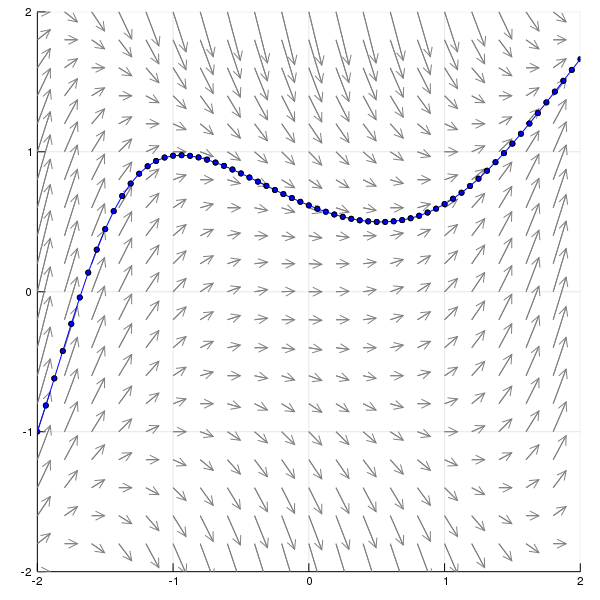

In [7]:
# Ex. 2: y' = t² - y², y(-2) = -1, y(2) = ?
f(t,y) = t^2 - y^2

h = 0.0625
t0, y0 = -2.0, -1.0
tf = 2.0

quiver(x, x', quiver=(t,y)->[1.0; f(t,y)] / N * 2, c=:grey)
#plot!(t -> exp(t^2/2 - 1/2), -1, 2, c=:red, lw=2)
while t0 < tf
    t1 = t0 + h
    y1 = y0 + h * f(t0, y0)
    scatter!([t0; t1], [y0; y1], c=:blue, ms=3, leg=false)
    plot!([t0; t1], [y0; y1], c=:blue)
    t0, y0 = t1, y1
end
xlims!(extrema(x)...)
ylims!(extrema(x)...)

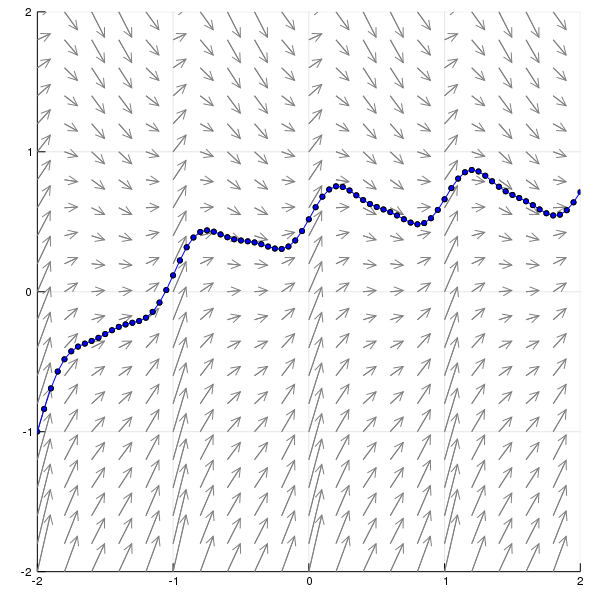

In [8]:
# Ex. 2: y' = t² - y², y(-2) = -1, y(2) = ?
f(t,y) = (cos(2π * t) + 0.5)^2 - y

h = 0.05
t0, y0 = -2.0, -1.0
tf = 2.0

quiver(x, x', quiver=(t,y)->[1.0; f(t,y)] / N * 2, c=:grey)
#plot!(t -> atan(sin(2π * t) / 2π - π/2), -2, 2, c=:red, lw=2)
while t0 < tf
    t1 = t0 + h
    y1 = y0 + h * f(t0, y0)
    scatter!([t0; t1], [y0; y1], c=:blue, ms=3, leg=false)
    plot!([t0; t1], [y0; y1], c=:blue)
    t0, y0 = t1, y1
end
xlims!(extrema(x)...)
ylims!(extrema(x)...)

## Euler vetorial

Euler pode ser aplicado trivialmente para sistemas de equações diferencias:
\begin{align}
Y'(t) & = F(t, Y(t)) \\
Y(t_0) & = Y_0.
\end{align}

$$ Y_{k+1} = Y_k + h F(t_k, Y_k). $$

Ex.: \begin{align}
x'(t) & = -y(t) \\
y'(t) & =  x(t) \\
 x(0) & =  1 \\
 y(0) & =  0
\end{align}

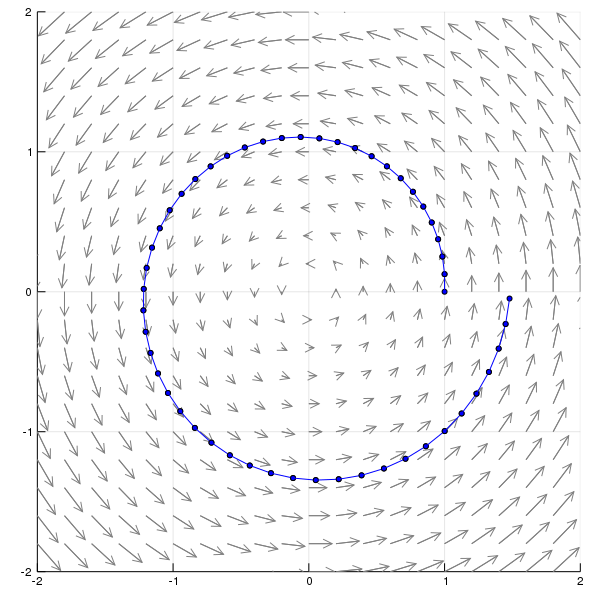

In [9]:
# Ex. 1: x'(t) = f1(t, x, y) = -y(t)
#        y'(t) = f2(t, x, y) =  x(t)

f1(t, x, y) = -y
f2(t, x, y) =  x

N = 21
x = linspace(-2, 2, N)

h = 2π / 50
t0, x0, y0 = 0.0, 1.0, 0.0
tf = 2π

quiver(x, x', quiver=(x,y)->[-y; x] / N * 2, c=:grey)
while t0 < tf
    t1 = t0 + h
    x1 = x0 + h * f1(t0, x0, y0)
    y1 = y0 + h * f2(t0, x0, y0)
    scatter!([x0; x1], [y0; y1], c=:blue, ms=3, leg=false)
    plot!([x0; x1], [y0; y1], c=:blue)
    t0, x0, y0 = t1, x1, y1
end

xlims!(extrema(x)...)
ylims!(extrema(x)...)

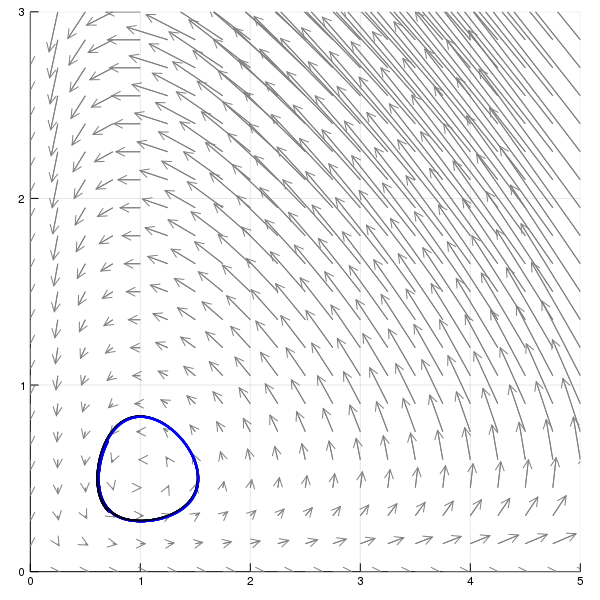

In [10]:
# Ex. 1: x'(t) = f1(t, x, y) = -y(t)
#        y'(t) = f2(t, x, y) =  x(t)

α, β, δ, γ = 2/3, 4/3, 1, 1
f1(t, x, y) = α * x - β * x * y
f2(t, x, y) = δ * x * y - γ * y

N = 21
x = linspace(0, 5, N)
y = linspace(0, 3, N)

h = 1e-2
t0, x0, y0 = 0.0, 0.7, 0.7
tf = 10.0

quiver(x, y', quiver=(x,y)->[f1(0, x, y); f2(0, x, y)] / N * 2, c=:grey)
while t0 < tf
    t1 = t0 + h
    x1 = x0 + h * f1(t0, x0, y0)
    y1 = y0 + h * f2(t0, x0, y0)
    scatter!([x0; x1], [y0; y1], c=:blue, ms=1, leg=false)
    plot!([x0; x1], [y0; y1], c=:blue)
    t0, x0, y0 = t1, x1, y1
end

xlims!(extrema(x)...)
ylims!(extrema(y)...)

In [11]:
function Euler(t0, Y0, F, tf; n = 100)
    h = (tf - t0) / n
    N = length(Y0)
    Y = zeros(N, n + 1)
    Y[:,1] = Y0
    t = t0
    for i = 1:n
        Y[:,i+1] = Y[:,i] + h * F(t, Y[:,i])
        t = t + h
    end
    return Y
end

Euler (generic function with 1 method)

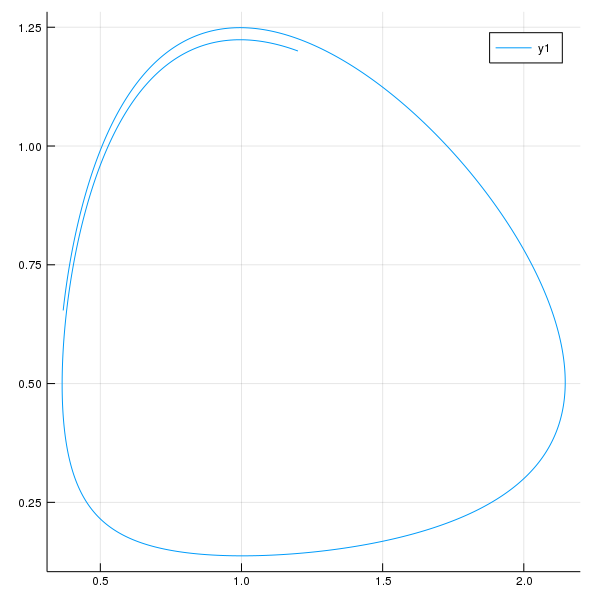

In [12]:
α, β, δ, γ = 2/3, 4/3, 1, 1
F(t, Y) = [α * Y[1] - β * Y[1] * Y[2];
           δ * Y[1] * Y[2] - γ * Y[2]]
Y = Euler(0.0, [1.2; 1.2], F, 10.0, n=1000)
x = Y[1,:]
y = Y[2,:]
plot(x, y)

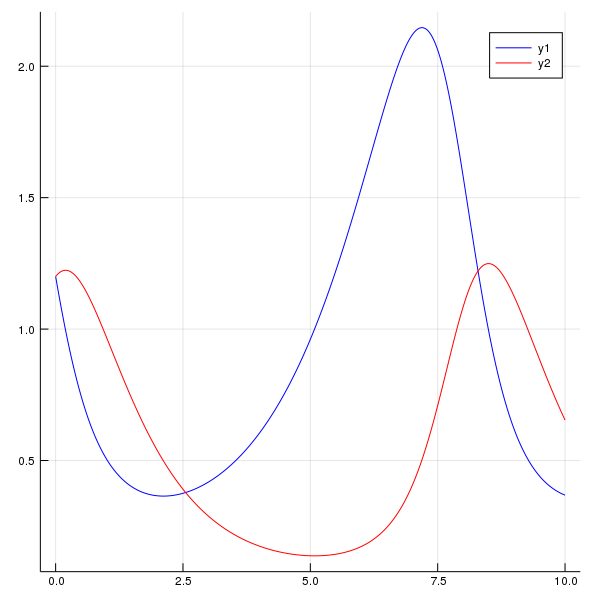

In [13]:
plot(linspace(0.0, 10.0, 1001), x, c=:blue)
plot!(linspace(0.0, 10.0, 1001), y, c=:red)

## Euler Aperfeiçoado

\begin{align*}
 \kappa_1 & = f(t_k, y_k) \\
 \kappa_2 & = f(t_k + h, y_k + h\kappa_1) \\
  y_{k+1} & = y_k + \tfrac{1}{2} h (\kappa_1 + \kappa_2)
\end{align*}

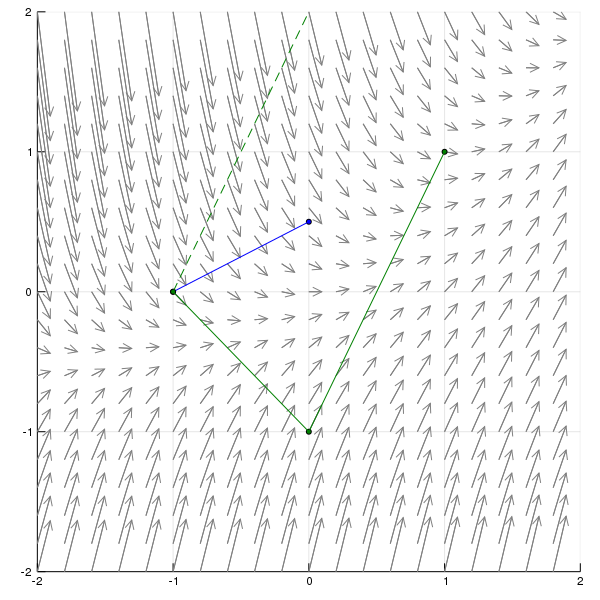

In [14]:
f(t, y) = t * sin(y) + t - 2y
t0, y0 = -1.0, 0.0
h = 1.0
t1 = t0 + h
t2 = t1 + h
κ₁ = f(t0, y0)
y1 = y0 + h * κ₁
κ₂ = f(t0 + h, y1)
y2 = y1 + h * κ₂
w1 = y0 + h * (κ₁ + κ₂) / 2
x = linspace(-2, 2, 21)
quiver(x, x', quiver=(t,y)->[1.0; f(t,y)] / N * 2, c=:grey)
scatter!([t0; t1], [y0; w1], c=:blue, ms=3, leg=false)
plot!([t0; t1], [y0; w1], c=:blue)
scatter!([t0; t1; t2], [y0; y1; y2], c=:green, ms=3)
plot!([t0; t1; t2], [y0; y1; y2], c=:green)
plot!([t0; t1], [y0; y2 - y1;], c=:green, l = :dash)
xlims!(extrema(x)...)
ylims!(extrema(x)...)

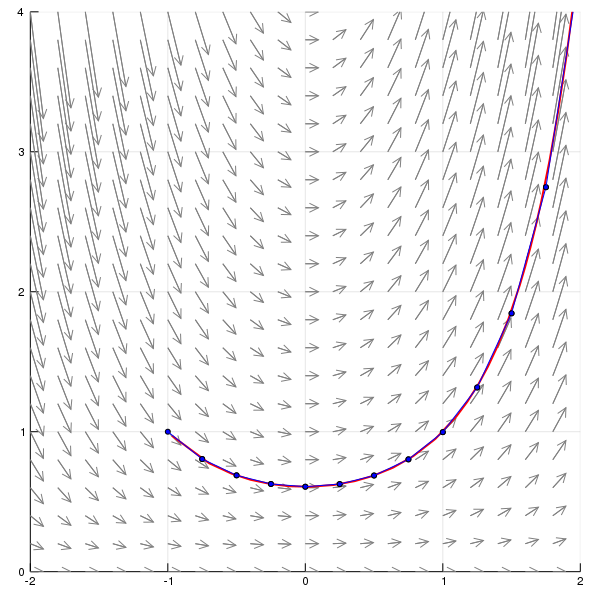

In [15]:
x = linspace(-2, 2, 21)
y = linspace(0, 4, 21)

f(t, y) = t * y
t0, y0 = -1.0, 1.0
h = 0.25

quiver(x, y', quiver=(t,y)->[1.0; f(t,y)] / N * 2, c=:grey)
plot!(t -> exp(t^2/2 - 1/2), -1, 2, c=:red, lw=2)
for k = 1:60
    t1 = t0 + h
    κ₁ = f(t0, y0)
    κ₂ = f(t0 + h, y0 + h * κ₁)
    y1 = y0 + h * (κ₁ + κ₂) / 2
    scatter!([t0; t1], [y0; y1], c=:blue, ms=3, leg=false)
    plot!([t0; t1], [y0; y1], c=:blue)
    t0, y0 = t1, y1
end
xlims!(extrema(x)...)
ylims!(extrema(y)...)

In [16]:
function EulerAperfeicoado(t0, Y0, F, tf; n = 100)
    h = (tf - t0) / n
    N = length(Y0)
    Y = zeros(N, n + 1)
    Y[:,1] = Y0
    t = t0
    for i = 1:n
        κ₁ = F(t, Y[:,i])
        κ₂ = F(t + h, Y[:,i] + h * κ₁)
        Y[:,i+1] = Y[:,i] + h * (κ₁ + κ₂) / 2
        t = t + h
    end
    return Y
end

EulerAperfeicoado (generic function with 1 method)

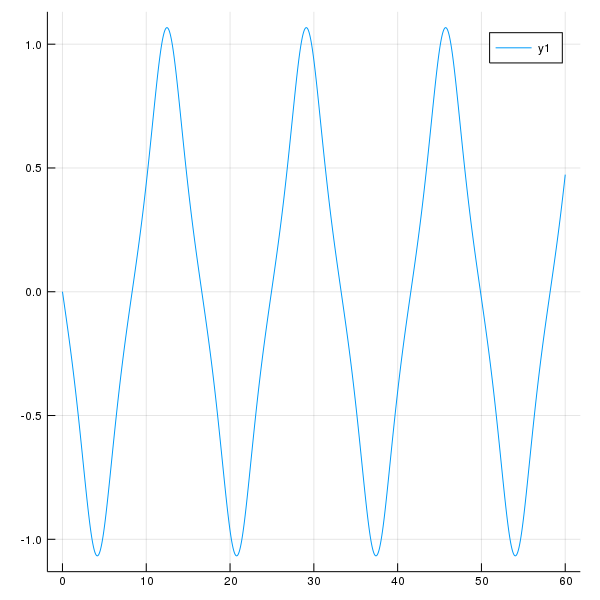

In [17]:
# θ' = ω
# ω' = (g / ℓ) * sin θ
g = -1.0
ℓ = 3.0
θ₀ = 0.75 * π
ω₀ = 0.0
t₀, tₙ = 0.0, 60.0
F(t, Y) = [Y[2]; (g / ℓ) * sin(Y[1])]
n = 10000
Y = EulerAperfeicoado(t₀, [θ₀; ω₀], F, tₙ, n=n)

# Plot
θ = Y[1,:]
ω = Y[2,:]

plot(linspace(t₀, tₙ, n+1), ω)

In [18]:
gr(size=(600,600))
anim = Animation()

x = ℓ * sin.(θ)
y = -ℓ * cos.(θ)

skip = div(n, 200)
tail = skip * 5
for i = 1:skip:n
    plot(leg=false)
    j = max(1,i - tail)
    plot!(x[j:i], y[j:i], c=:green)
    k = max(1,j - tail)
    if j > 1
        plot!(x[k:j], y[k:j], c=:blue)
    end
    
    xi = x[i]
    yi = y[i]
    
    plot!([0.0; xi], [0.0; yi], lw=2, c=:black)
    scatter!([xi], [yi], m=(stroke(1,:gray),:lightblue,10))
    xlims!(-1.2ℓ, 1.2ℓ)
    ylims!(-1.2ℓ, 1.2ℓ)
    
    frame(anim)
end
gif(anim, "pendulo.gif", fps=24)

INFO: Saved animation to /home/abel/disciplinas/cm103/material/pendulo.gif


Plots.AnimatedGif("/home/abel/disciplinas/cm103/material/pendulo.gif")

## Eq. Dif. - Problemas de Valor de Contorno

\begin{align}
y''(x) & = f(x, y, y'), \qquad a < x < b \\
\text{Condições em } x = a & \qquad (e.g. y(a) = y_a, \quad y'(a) = y_a') \\
\text{Condições em } x = b & \qquad (e.g. y(b) = y_b, \quad y'(b) = y_b').
\end{align}

Ex.:
\begin{align}
y''(x) & = 10y(x), \qquad 0 < x < 1 \\
y(0) & = 0, \\
y(1) & = 1.
\end{align}

O método de resolução deste problema que estudaremos é o de **Diferenças Dividas**, que consiste em aproximar as derivadas como fizemos no começo do curso.

Inicialmente, considere o intervalo $[a,b]$ e a malha sobre o intervalo $a = x_0 < x_1 < \cdots < x_{n+1} = b$, com $h = x_{i+1} - x_i$.

Daí, consideramos as aproximações $y(x_i) \approx y_i$. Agora, usaremos aproximações pras derivadas, que podem ser de três tipos:
- Avançada: $y'(x_i) \approx \dfrac{y_{i+1} - y_i}{h}$,
- Atrasada: $y'(x_i) \approx \dfrac{y_i - y_{i-1}}{h}$,
- Centrada: $y'(x_i) \approx \dfrac{y_{i+1} - y_{i-1}}{2h}$.

E para aproximação da segunda derivada, usaremos só a centrada:

$$ y''(x_i) \approx \frac{y_{i+1} - 2y_i + y_{i-1}}{h^2} $$

No nosso exemplo, $y'' = 10y$, transformamos em
$$ \frac{y_{i+1} - 2y_i + y_{i-1}}{h^2} = 10y_i, \qquad i = 1,\dots,n. $$
Multiplicando por $h^2$ e colocando em evidência, temos
$$ y_{i-1} - y_i(10h^2 + 2) + y_{i+1} = 0, \qquad i = 1,\dots,n. $$

Veja que fazemos essa expansão para $i = 1,\dots,n$. Em $i = 1$, acontece
$$ y_0 - y_1(10h^2 + 2) + y_2 = 0, $$
e
$$ y_{n-1} - (10h^2 + 2)y_n + y_{n+1} = 0, $$
isto é, nos dois casos temos que usar as condições de contorno:
$$ y(0) = 0 \quad \Rightarrow \quad y_0 = 0, $$
$$ y(1) = 1 \quad \Rightarrow \quad y_{n+1} = 1, $$
obtendo
$$ -y_1(10h^2 + 2) + y_2 = 0, $$
e
$$ y_{n-1} - (10h^2 + 2)y_n = -1. $$

Considere para $n = 4$, na ordem:
$$
\left\{\begin{array}{rrrrcl}
-(10h^2 + 2)y_1 & + y_2           &                &                 & = & 0 \\
         y_1 & - (10h^2 + 2) y_2 & + y_3           &                 & = & 0 \\
             &             y_2 & - (10h^2 + 2) y_3 & + y_4           & = & 0 \\
             &                 &             y_3 & - (10h^2 + 2) y_4 & = & -1 
\end{array}\right.
$$

Que obviamente é um sistema linear $Ay = b$ com $A$ tridiagonal, na diagonal $-(10h^2 + 2)$, e $1$ nos outros elementos não nulos, e o vetor $b$ é de zeros, exceto na última coordenada.

Note ainda que com $n = 4$, temos $x_0 = 0$ e $x_5 = 1$, de modo que $h = 1 / 5$.

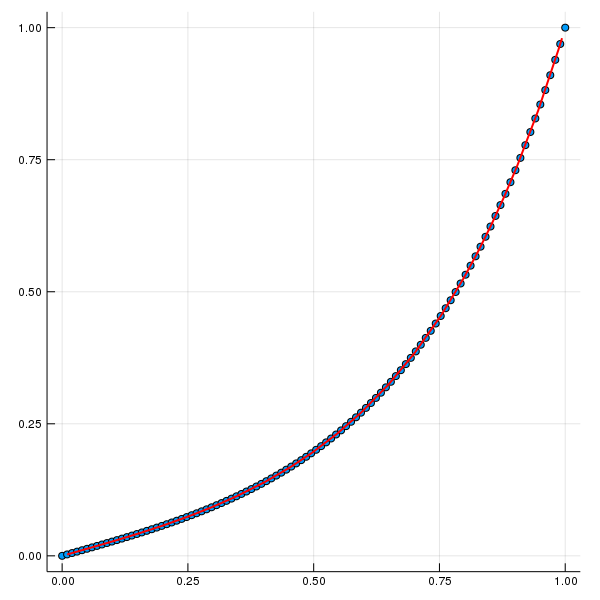

In [35]:
n = 100
h = 1 / (n + 1)
A = diagm(ones(n-1), -1) + diagm(ones(n-1), 1) - (10h^2 + 2) * I
b = zeros(n)
b[n] = -1.0
y = A \ b

sol(x) = (exp(sqrt(10)*x) - exp(-sqrt(10)*x)) / (exp(sqrt(10)) - exp(-sqrt(10)))
xlin = linspace(0.0, 1.0, n+2)
scatter(xlin, [0.0; y; 1.0], leg=false)
plot!(sol, 0, 1, lw=2, c=:red, leg=false)

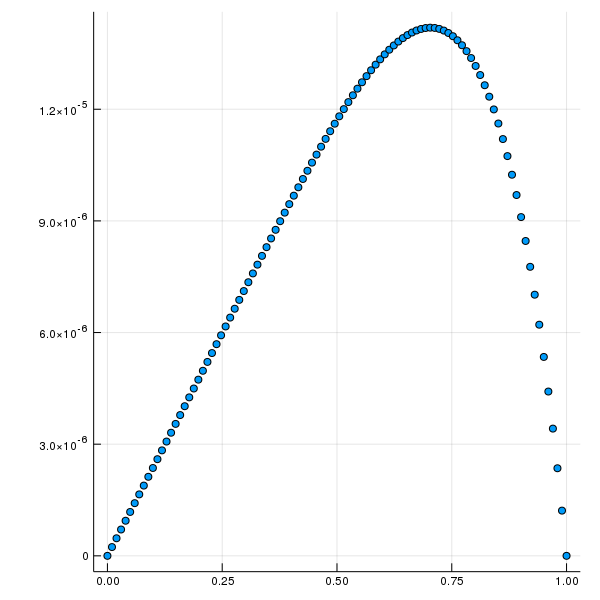

In [36]:
scatter(xlin, [0.0; y; 1.0] - sol.(xlin), leg=false)

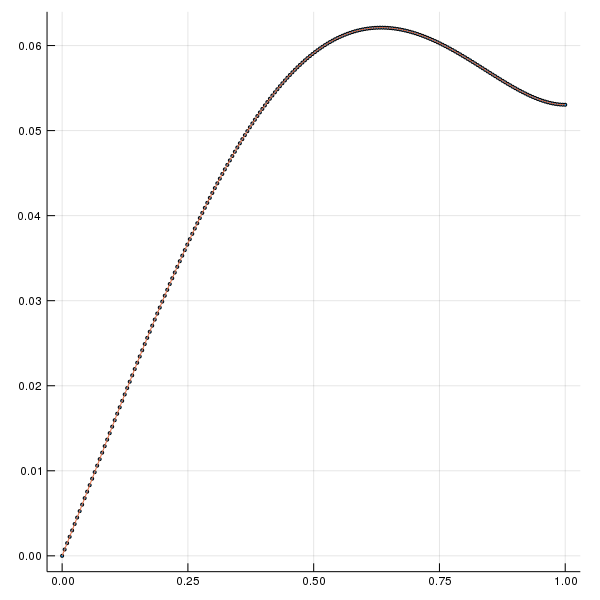

In [68]:
# Ex 2: y'' = -σ y' + ϵ y - gext(x)
gext(x) = 4 * x * (1 - x)
σ = -1.0
ϵ = 10.0
n = 200
x = linspace(0.0, 1.0, n+2)
h = 1 / (n + 1)

diag_abaixo = (2 - σ * h) * ones(n)
diag_abaixo[n] = 4

diag_acima = (2 + σ * h) * ones(n)

A = diagm(diag_abaixo, -1) + diagm(diag_acima, 1) - (4 + 2ϵ * h^2) * I

b = -2h^2 * gext.(x[2:end])
y = A \ b

#sol(x) = (exp(sqrt(10)*x) - exp(-sqrt(10)*x)) / (exp(sqrt(10)) - exp(-sqrt(10)))
scatter(x, [0.0; y], leg=false, ms=2)
plot!(x, [0.0; y], leg=false)
#plot!(sol, 0, 1, lw=2, c=:red, leg=false)